In [1]:
import pandas as pd
import numpy as np
import prepare
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
import scipy.stats as stats
from sklearn.model_selection import train_test_split


# import models
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE

import warnings
warnings.filterwarnings("ignore")

In [2]:
from acquire import get_zillow_data

In [3]:
# acquire zillow dataset 
df = get_zillow_data()




In [4]:
#check the zillow data
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt,taxamount,propertylandusetypeid
0,11721753,2.0,3.0,1316.0,6037.0,1923.0,205123.0,2627.48,261.0
1,11289917,2.0,3.0,1458.0,6037.0,1970.0,136104.0,2319.90,261.0
2,11705026,1.0,2.0,1421.0,6037.0,1911.0,35606.0,543.69,261.0
3,14269464,3.0,4.0,2541.0,6059.0,2003.0,880456.0,9819.72,261.0
4,11446756,2.0,3.0,1491.0,6037.0,1955.0,107110.0,1399.27,261.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28186 entries, 0 to 28185
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28186 non-null  int64  
 1   bathroomcnt                   28186 non-null  float64
 2   bedroomcnt                    28186 non-null  float64
 3   calculatedfinishedsquarefeet  28118 non-null  float64
 4   fips                          28186 non-null  float64
 5   yearbuilt                     28094 non-null  float64
 6   taxvaluedollarcnt             28185 non-null  float64
 7   taxamount                     28185 non-null  float64
 8   propertylandusetypeid         28186 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 2.2 MB


In [6]:
df.shape

(28186, 9)

PREPARE STAGE

In [7]:
#check df for null values
df.isnull().sum()

parcelid                         0
bathroomcnt                      0
bedroomcnt                       0
calculatedfinishedsquarefeet    68
fips                             0
yearbuilt                       92
taxvaluedollarcnt                1
taxamount                        1
propertylandusetypeid            0
dtype: int64

In [8]:
#drop the null values from df
df = df.dropna()

In [9]:
#check that they were dropped
df.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
yearbuilt                       0
taxvaluedollarcnt               0
taxamount                       0
propertylandusetypeid           0
dtype: int64

In [10]:
df['parcelid'].duplicated().value_counts()

False    28065
True        24
Name: parcelid, dtype: int64

In [11]:
df.drop_duplicates(subset = ['parcelid'], inplace=True)

In [12]:
df['parcelid'].duplicated().value_counts()

False    28065
Name: parcelid, dtype: int64

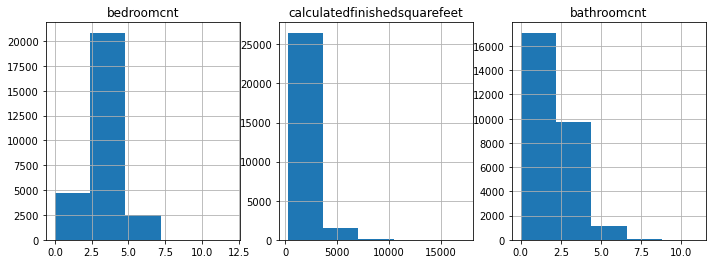

In [13]:
# Plot 
plt.figure(figsize=(16, 4))

# List of columns
cols = [ 'bedroomcnt','calculatedfinishedsquarefeet', 'bathroomcnt']

for i, col in enumerate(cols):

    # start the plot with i at 0
    plot_number = i + 1 

    # Create  the subplot.
    plt.subplot(1,4, plot_number)

    # Create the title from the column
    plt.title(col)

    # show histgram of column
    df[col].hist(bins=5)


DATA VALIDATION

In [14]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt,taxamount,propertylandusetypeid
0,11721753,2.0,3.0,1316.0,6037.0,1923.0,205123.0,2627.48,261.0
1,11289917,2.0,3.0,1458.0,6037.0,1970.0,136104.0,2319.90,261.0
2,11705026,1.0,2.0,1421.0,6037.0,1911.0,35606.0,543.69,261.0
3,14269464,3.0,4.0,2541.0,6059.0,2003.0,880456.0,9819.72,261.0
4,11446756,2.0,3.0,1491.0,6037.0,1955.0,107110.0,1399.27,261.0


In [15]:
df.rename(columns={'bathroomcnt': 'baths', 
                     'bedroomcnt': 'beds',
                     'calculatedfinishedsquarefeet': 'sqrft',
                     'fips': 'county',
                     'taxvaluedollarcnt': 'taxval',
                     'taxamount': 'taxamt'}, inplace=True
            )

In [16]:
df.head()


,parcelid,baths,beds,sqrft,county,yearbuilt,taxval,taxamt,propertylandusetypeid
0,11721753,2.0,3.0,1316.0,6037.0,1923.0,205123.0,2627.48,261.0
1,11289917,2.0,3.0,1458.0,6037.0,1970.0,136104.0,2319.90,261.0
2,11705026,1.0,2.0,1421.0,6037.0,1911.0,35606.0,543.69,261.0
3,14269464,3.0,4.0,2541.0,6059.0,2003.0,880456.0,9819.72,261.0
4,11446756,2.0,3.0,1491.0,6037.0,1955.0,107110.0,1399.27,261.0


In [17]:
df['propertylandusetypeid'].value_counts()

261.0    28026
263.0       28
260.0        8
264.0        3
Name: propertylandusetypeid, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28065 entries, 0 to 28184
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   parcelid               28065 non-null  int64  
 1   baths                  28065 non-null  float64
 2   beds                   28065 non-null  float64
 3   sqrft                  28065 non-null  float64
 4   county                 28065 non-null  float64
 5   yearbuilt              28065 non-null  float64
 6   taxval                 28065 non-null  float64
 7   taxamt                 28065 non-null  float64
 8   propertylandusetypeid  28065 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 2.1 MB


In [19]:
def outlier_bound_calculation(df, variable):
    '''
    find lower and upper bounds to get outliers 
    '''
    quartile1, quartile3 = np.percentile(df[variable], [25,75])
    IQR_value = quartile3 - quartile1
    lower_bound = quartile1 - (1.5 * IQR_value)
    upper_bound = quartile3 + (1.5 * IQR_value)
    '''
    returns  lowerbound/upperbound 
    '''
    return print(f'The lower bound for {variable} is {lower_bound} and the upper bound for {variable} is {upper_bound}')

In [20]:
outlier_bound_calculation(df, 'baths')

The lower bound for baths is 0.5 and the upper bound for baths is 4.5


In [21]:
df= df[df.baths > 0.5]
df= df[df.baths < 4.5]

In [22]:
outlier_bound_calculation(df, 'beds')

The lower bound for beds is 1.5 and the upper bound for beds is 5.5


In [23]:
outlier_bound_calculation(df, 'sqrft')

The lower bound for sqrft is -152.5 and the upper bound for sqrft is 3619.5


In [24]:
f= df[df.sqrft > -152.5]
df= df[df.sqrft < 3619.5]

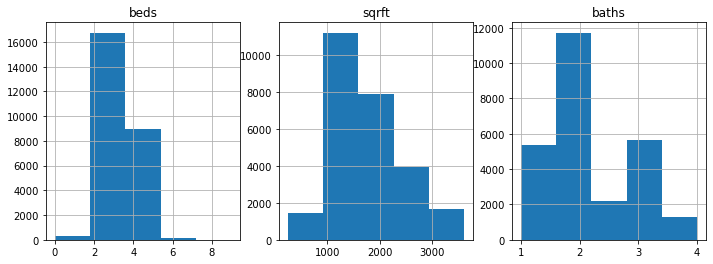

In [25]:
# Plot 
plt.figure(figsize=(16, 4))

# List of columns
cols = ['beds','sqrft','baths']

for i, col in enumerate(cols):

    # i is 0, start plots at 1
    plot_number = i + 1 

    # make subplot
    plt.subplot(1,4, plot_number)

    # column names are titles
    plt.title(col)

    # show histogram for each column
    df[col].hist(bins=5)


In [26]:
df.head(3)

,parcelid,baths,beds,sqrft,county,yearbuilt,taxval,taxamt,propertylandusetypeid
0,11721753,2.0,3.0,1316.0,6037.0,1923.0,205123.0,2627.48,261.0
1,11289917,2.0,3.0,1458.0,6037.0,1970.0,136104.0,2319.90,261.0
2,11705026,1.0,2.0,1421.0,6037.0,1911.0,35606.0,543.69,261.0


In [27]:
def split_continuous(df):
    '''
    uses a data frame to create the train, validate, and test DataFrames needed
    '''
    # makes the train, validate and test
    train_validate, test = train_test_split(df, 
                                        test_size=.2, 
                                        random_state=123)
    # makes train and validate
    train, validate = train_test_split(train_validate, 
                                   test_size=.3, 
                                   random_state=123)
    return train, validate, test

In [28]:
# the data gets split into train, validate and test
train, test = train_test_split(df, test_size = 0.2, random_state = 1349)
train, validate = train_test_split(train, test_size = 0.25, random_state = 1349)

In [29]:
#verify the new shape
train.shape, validate.shape, test.shape

((15717, 9), (5239, 9), (5240, 9))

In [30]:
train.head()

,parcelid,baths,beds,sqrft,county,yearbuilt,taxval,taxamt,propertylandusetypeid
22934,11707491,1.0,2.0,1056.0,6037.0,1912.0,162078.0,2054.33,261.0
6379,13029067,2.0,3.0,1647.0,6037.0,1956.0,400436.0,4984.65,261.0
10837,17125619,1.0,2.0,886.0,6111.0,1940.0,435000.0,4642.44,261.0
9630,13015375,2.0,3.0,1465.0,6037.0,1960.0,274408.0,3424.54,261.0
6005,11832235,1.0,2.0,1128.0,6037.0,1950.0,43854.0,845.79,261.0


In [31]:
def split_target(train, validate, test, taxval):
    # split train into X dropping taxval and set y to taxval
    X_train = train.drop(columns=['taxval'])
    y_train = train['taxval']

    # split train into X dropping taxval and set y to taxval
    X_validate = validate.drop(columns=['taxval'])
    y_validate = validate['taxval']

    # split train into X dropping taxval and set y to taxval
    X_test = test.drop(columns=['taxval'])
    y_test = test['taxval']

    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [32]:
X_train, y_train, X_validate, y_validate, X_test, y_test=split_target(train, validate, test, 'taxval')

In [33]:
numeric_cols = ['sqrft', 'taxamt']

In [34]:
def min_max_scale(X_train, X_validate, X_test, numeric_cols):
    """
    takes in the three dataframes with column names,
    scaler only takes numeric columns,so a list of numeric column names,
    uses min/max scaler on first data frame and then transforms the other dataframes according to that scale
    returns three dataframes with the same column names and scaled values.
    """
    # identify min and max
    
    scaler = MinMaxScaler(copy=True).fit(X_train[numeric_cols])

    # scale X_train, X_validate, X_test using the mins and maxes stored in the scaler derived from X_train.
    #
    X_train_scaled_array = scaler.transform(X_train[numeric_cols])
    X_validate_scaled_array = scaler.transform(X_validate[numeric_cols])
    X_test_scaled_array = scaler.transform(X_test[numeric_cols])

    # convert to dataframes
    X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=numeric_cols).set_index(
        [X_train.index.values]
    )

    X_validate_scaled = pd.DataFrame(
        X_validate_scaled_array, columns=numeric_cols
    ).set_index([X_validate.index.values])

    X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=numeric_cols).set_index(
        [X_test.index.values]
    )
    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [35]:
X_train_scaled, X_validate_scaled, X_test_scaled= min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [36]:
X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

((15717, 2), (5239, 2), (5240, 2))

In [37]:
X_train_scaled

,sqrft,taxamt
22934,0.241635,0.018212
6379,0.416642,0.044996
10837,0.191294,0.041868
9630,0.362748,0.030736
6005,0.262955,0.007166
...,...,...
10446,0.197809,0.010734
26676,0.335209,0.015556
25459,0.304412,0.007049
10339,0.370743,0.031886


EXPLORE

<AxesSubplot:xlabel='taxval'>

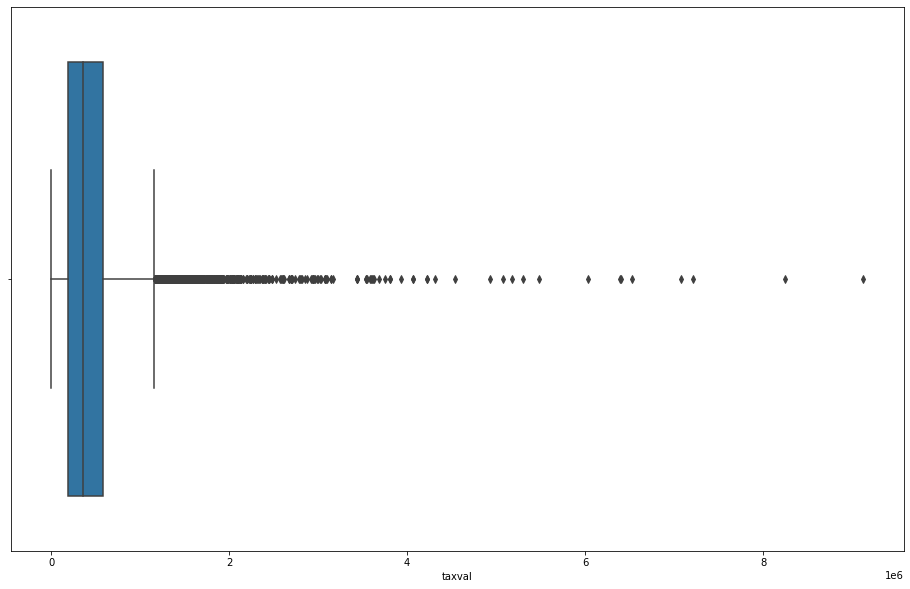

In [38]:
plt.figure(figsize=(16, 10))
sns.boxplot(train['taxval'])

In [39]:
df_corr = train.drop(columns=['parcelid', 'propertylandusetypeid'])
df_corr

,baths,beds,sqrft,county,yearbuilt,taxval,taxamt
22934,1.0,2.0,1056.0,6037.0,1912.0,162078.0,2054.33
6379,2.0,3.0,1647.0,6037.0,1956.0,400436.0,4984.65
10837,1.0,2.0,886.0,6111.0,1940.0,435000.0,4642.44
9630,2.0,3.0,1465.0,6037.0,1960.0,274408.0,3424.54
6005,1.0,2.0,1128.0,6037.0,1950.0,43854.0,845.79
...,...,...,...,...,...,...,...
10446,1.0,2.0,908.0,6037.0,1913.0,83774.0,1236.23
26676,1.0,3.0,1372.0,6037.0,1926.0,139503.0,1763.72
25459,2.0,3.0,1268.0,6059.0,1954.0,51933.0,833.08
10339,2.5,3.0,1492.0,6059.0,1989.0,352440.0,3550.40


KBEST

In [40]:
f_selector = SelectKBest(score_func=f_regression, k=2)
f_selector.fit(X_train_scaled, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x7f8963987310>)

In [41]:
mask = f_selector.get_support()
X_train_scaled.columns[mask]

Index(['sqrft', 'taxamt'], dtype='object')

In [42]:
X_train_kbest = f_selector.transform(X_train_scaled)
model = LinearRegression().fit(X_train_kbest, y_train)

T-TEST
There is not a correlation between tax value and square footage
There is a correlation between tax value and squarae footage

In [43]:
#alpha
alpha = 0.05

In [44]:
df.head()

,parcelid,baths,beds,sqrft,county,yearbuilt,taxval,taxamt,propertylandusetypeid
0,11721753,2.0,3.0,1316.0,6037.0,1923.0,205123.0,2627.48,261.0
1,11289917,2.0,3.0,1458.0,6037.0,1970.0,136104.0,2319.90,261.0
2,11705026,1.0,2.0,1421.0,6037.0,1911.0,35606.0,543.69,261.0
3,14269464,3.0,4.0,2541.0,6059.0,2003.0,880456.0,9819.72,261.0
4,11446756,2.0,3.0,1491.0,6037.0,1955.0,107110.0,1399.27,261.0


In [45]:
t, p = stats.ttest_ind(train.taxval,train.sqrft, equal_var=False)

In [92]:
# p check

p<alpha

True

In [47]:
# P is less than alpha, so we reject the null hypothesis

CORRELATION TEST
There is no correlation between bedroom count and tax value
There is a correlation between bedroom count and tax value

In [48]:
x = df['taxval']
y = df['beds']

In [49]:

r, p = stats.pearsonr(x, y)

In [50]:
p<alpha

True

In [51]:
#p is less than alpha, so we reject the null

In [52]:
x2 = df['taxval']
y2 = df['baths']

In [53]:
r, p = stats.pearsonr(x2, y2)

In [54]:
p<alpha

True

In [55]:
#p is less than alpha so we reject the null
#mvp is related to price

In [56]:
#mvp drivers baths, beds, sqft

In [57]:
df.head()

,parcelid,baths,beds,sqrft,county,yearbuilt,taxval,taxamt,propertylandusetypeid
0,11721753,2.0,3.0,1316.0,6037.0,1923.0,205123.0,2627.48,261.0
1,11289917,2.0,3.0,1458.0,6037.0,1970.0,136104.0,2319.90,261.0
2,11705026,1.0,2.0,1421.0,6037.0,1911.0,35606.0,543.69,261.0
3,14269464,3.0,4.0,2541.0,6059.0,2003.0,880456.0,9819.72,261.0
4,11446756,2.0,3.0,1491.0,6037.0,1955.0,107110.0,1399.27,261.0


MODELING

In [58]:
#start testing the data in models

In [59]:
y_train.head()

22934    162078.0
6379     400436.0
10837    435000.0
9630     274408.0
6005      43854.0
Name: taxval, dtype: float64

BASELINE

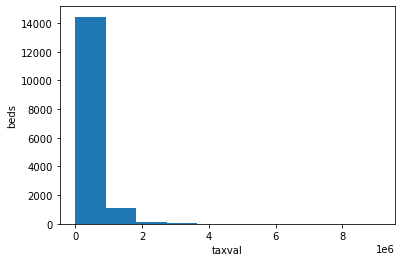

In [60]:
# plot to see if it may help find the algorithm to use

plt.hist(y_train)
plt.xlabel("taxval")
plt.ylabel("beds")
plt.show()

In [61]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame({'taxval': y_train})
y_validate = pd.DataFrame({'taxval':y_validate})
y_test = pd.DataFrame({'taxval': y_test})


# 1. Predict taxval_pred_mean
taxval_pred_mean = y_train.taxval.mean()
y_train['taxval_pred_mean'] = taxval_pred_mean
y_validate['taxval_pred_mean'] = taxval_pred_mean
y_test['taxval_pred_mean'] = taxval_pred_mean

# 2. compute taxval_pred_median
taxval_pred_median = y_train.taxval.median()
y_train['taxval_pred_median'] = taxval_pred_median
y_validate['taxval_pred_median'] = taxval_pred_median
y_test['taxval_pred_median'] = taxval_pred_median

# 3. RMSE of taxval_pred_mean
rmse_train = mean_squared_error(y_train.taxval, y_train.taxval_pred_mean) ** 0.5
rmse_validate = mean_squared_error(y_validate.taxval, y_validate.taxval_pred_mean) ** 0.5

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))


RMSE using Mean
Train/In-Sample:  421875.89 
Validate/Out-of-Sample:  429523.65


In [62]:
X_train

,parcelid,baths,beds,sqrft,county,yearbuilt,taxamt,propertylandusetypeid
22934,11707491,1.0,2.0,1056.0,6037.0,1912.0,2054.33,261.0
6379,13029067,2.0,3.0,1647.0,6037.0,1956.0,4984.65,261.0
10837,17125619,1.0,2.0,886.0,6111.0,1940.0,4642.44,261.0
9630,13015375,2.0,3.0,1465.0,6037.0,1960.0,3424.54,261.0
6005,11832235,1.0,2.0,1128.0,6037.0,1950.0,845.79,261.0
...,...,...,...,...,...,...,...,...
10446,12217300,1.0,2.0,908.0,6037.0,1913.0,1236.23,261.0
26676,12598589,1.0,3.0,1372.0,6037.0,1926.0,1763.72,261.0
25459,13916709,2.0,3.0,1268.0,6059.0,1954.0,833.08,261.0
10339,14384639,2.5,3.0,1492.0,6059.0,1989.0,3550.40,261.0


In [63]:
y_train

,taxval,taxval_pred_mean,taxval_pred_median
22934,162078.0,446485.48139,361811.0
6379,400436.0,446485.48139,361811.0
10837,435000.0,446485.48139,361811.0
9630,274408.0,446485.48139,361811.0
6005,43854.0,446485.48139,361811.0
...,...,...,...
10446,83774.0,446485.48139,361811.0
26676,139503.0,446485.48139,361811.0
25459,51933.0,446485.48139,361811.0
10339,352440.0,446485.48139,361811.0


In [64]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxval, y_validate.taxval_pred_mean)}])

In [65]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,429523.652914,0.0


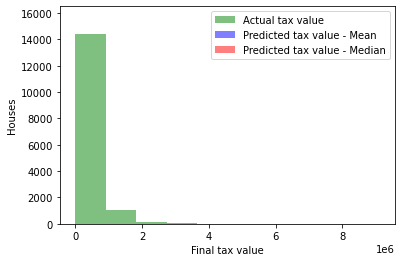

In [66]:
plt.hist(y_train.taxval, color='Green', alpha=.5, label="Actual tax value")
plt.hist(y_train.taxval_pred_mean, bins=1, color='blue', alpha=.5, rwidth=100, label="Predicted tax value - Mean")
plt.hist(y_train.taxval_pred_median, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted tax value - Median")
plt.xlabel("Final tax value")
plt.ylabel("Houses")
plt.legend()
plt.show()

Linear Regression

In [67]:
lm = LinearRegression(normalize=True)
# fit the thing
# 
lm.fit(X_train, y_train.taxval)

# predict train
# 
# use the thing!
# 
y_train['taxval_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxval, y_train.taxval_pred_lm) ** (1/2)
# predict validate
y_validate['taxval_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxval, y_validate.taxval_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  82659.71946948857 
Validation/Out-of-Sample:  74437.57095879511


In [68]:
metric_df = metric_df.append(
    {
    'model': 'OLS lm',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxval, y_validate.taxval_pred_lm)}, ignore_index=True)

In [69]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,429523.652914,0.000000
1,OLS lm,74437.570959,0.969941


In [70]:
rmse_validate

74437.57095879511

LASSO LARS

In [71]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.taxval)

# predict train
y_train['taxval_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxval, y_train.taxval_pred_lars) ** 0.5

# predict validate
y_validate['taxval_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxval, y_validate.taxval_pred_lars) ** 0.5

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  82660.95135776716 
Validation/Out-of-Sample:  74435.3738629121


In [72]:
y_train

,taxval,taxval_pred_mean,taxval_pred_median,taxval_pred_lm,taxval_pred_lars
22934,162078.0,446485.48139,361811.0,165557.155805,165134.024340
6379,400436.0,446485.48139,361811.0,397437.939888,397434.711674
10837,435000.0,446485.48139,361811.0,435349.698872,434693.655918
9630,274408.0,446485.48139,361811.0,262305.826473,262437.713128
6005,43854.0,446485.48139,361811.0,42741.190470,42879.900104
...,...,...,...,...,...
10446,83774.0,446485.48139,361811.0,96031.942254,95662.725974
26676,139503.0,446485.48139,361811.0,132799.596216,132854.670390
25459,51933.0,446485.48139,361811.0,64954.782380,64891.079993
10339,352440.0,446485.48139,361811.0,280244.753645,280414.915242


In [73]:
metric_df = metric_df.append(
    {
    'model': 'LassoLars alpha 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxval, y_validate.taxval_pred_lars)}, ignore_index=True)

In [74]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,429523.652914,0.000000
1,OLS lm,74437.570959,0.969941
2,LassoLars alpha 1,74435.373863,0.969942


TWEEDIE REGRESSOR

In [75]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 

glm.fit(X_train, y_train.taxval)

# predict train
y_train['taxval_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxval, y_train.taxval_pred_glm) ** 0.5


# predict validate
y_validate['taxval_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxval, y_validate.taxval_pred_glm) ** 0.5


print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  421875.8885123898 
Validation/Out-of-Sample:  429523.6529138066


In [76]:
metric_df = metric_df.append(
    {
    'model': 'GLM Model power 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxval, y_validate.taxval_pred_glm)}, ignore_index=True)

In [77]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,429523.652914,0.000000e+00
1,OLS lm,74437.570959,9.699405e-01
2,LassoLars alpha 1,74435.373863,9.699423e-01
3,GLM Model power 1,429523.652914,1.110223e-16


In [78]:
y_train

,taxval,taxval_pred_mean,taxval_pred_median,taxval_pred_lm,taxval_pred_lars,taxval_pred_glm
22934,162078.0,446485.48139,361811.0,165557.155805,165134.024340,446485.48139
6379,400436.0,446485.48139,361811.0,397437.939888,397434.711674,446485.48139
10837,435000.0,446485.48139,361811.0,435349.698872,434693.655918,446485.48139
9630,274408.0,446485.48139,361811.0,262305.826473,262437.713128,446485.48139
6005,43854.0,446485.48139,361811.0,42741.190470,42879.900104,446485.48139
...,...,...,...,...,...,...
10446,83774.0,446485.48139,361811.0,96031.942254,95662.725974,446485.48139
26676,139503.0,446485.48139,361811.0,132799.596216,132854.670390,446485.48139
25459,51933.0,446485.48139,361811.0,64954.782380,64891.079993,446485.48139
10339,352440.0,446485.48139,361811.0,280244.753645,280414.915242,446485.48139


In [79]:
# run LassoLars the best model on the test data

In [80]:
y_test

,taxval,taxval_pred_mean,taxval_pred_median
10580,445279.0,446485.48139,361811.0
21270,393000.0,446485.48139,361811.0
23690,45723.0,446485.48139,361811.0
26803,374447.0,446485.48139,361811.0
26775,69331.0,446485.48139,361811.0
...,...,...,...
20200,386252.0,446485.48139,361811.0
2656,243331.0,446485.48139,361811.0
27518,213692.0,446485.48139,361811.0
21528,123000.0,446485.48139,361811.0


In [81]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_test, y_test.taxval)

# predict train
y_test['taxval_pred_lars'] = lars.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.taxval, y_test.taxval_pred_lars)**(1/2)

# predict validate
y_validate['taxval_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxval, y_validate.taxval_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_test, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  69135.25608727423 
Validation/Out-of-Sample:  74435.10238790516


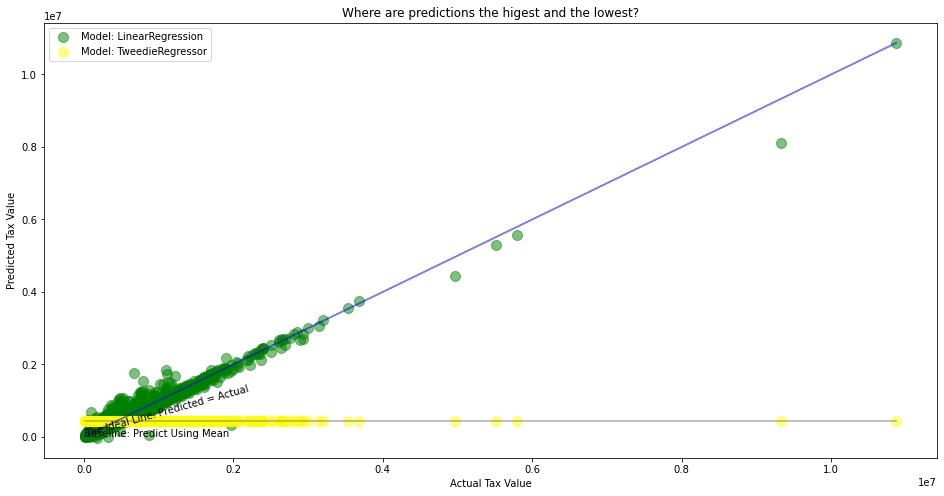

In [82]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.taxval, y_validate.taxval_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.taxval, y_validate.taxval, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.taxval, y_validate.taxval_pred_lm, 
            alpha=.5, color="Green", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxval, y_validate.taxval_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
#plt.scatter(y_validate.taxval, y_validate.taxval_pred_lm2, 
#           alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Where are predictions the higest and the lowest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()


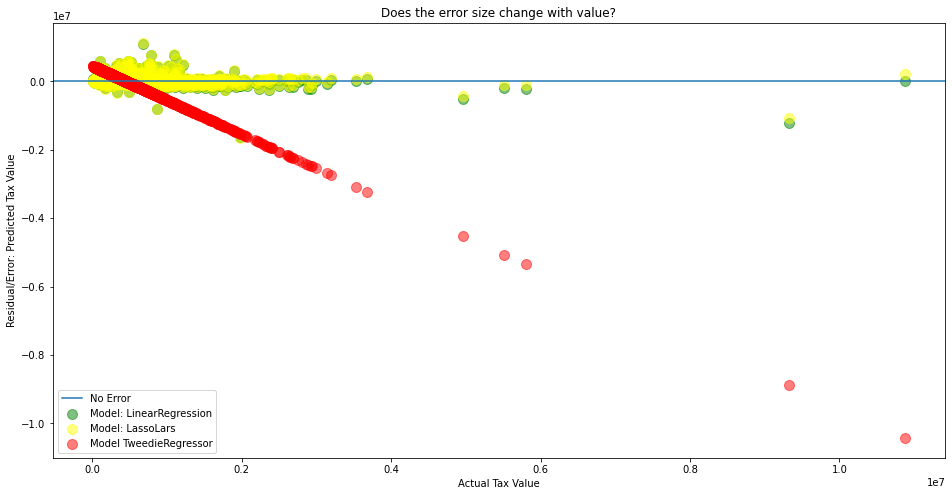

In [83]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.taxval, y_validate.taxval_pred_lm-y_validate.taxval, 
            alpha=.5, color="green", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxval, y_validate.taxval_pred_lars-y_validate.taxval, 
            alpha=.5, color="yellow", s=100, label="Model: LassoLars")
plt.scatter(y_validate.taxval, y_validate.taxval_pred_glm-y_validate.taxval, 
            alpha=.5, color="red", s=100, label="Model TweedieRegressor")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Residual/Error: Predicted Tax Value")
plt.title("Does the error size change with value?")
#plt.annotate("polynomial model is effected by noise", (5.0, -15))
#plt.annotate("Linear regression model is most consistent", (20.5, 5))
plt.show()

EXTRA DELIVERABLES

In [84]:
df.head()

,parcelid,baths,beds,sqrft,county,yearbuilt,taxval,taxamt,propertylandusetypeid
0,11721753,2.0,3.0,1316.0,6037.0,1923.0,205123.0,2627.48,261.0
1,11289917,2.0,3.0,1458.0,6037.0,1970.0,136104.0,2319.90,261.0
2,11705026,1.0,2.0,1421.0,6037.0,1911.0,35606.0,543.69,261.0
3,14269464,3.0,4.0,2541.0,6059.0,2003.0,880456.0,9819.72,261.0
4,11446756,2.0,3.0,1491.0,6037.0,1955.0,107110.0,1399.27,261.0


Figure out how to calcuate tax rate

In [85]:
df_taxrate = df[['parcelid', 'county', 'taxval', 'taxamt']]

In [86]:
df_taxrate

,parcelid,county,taxval,taxamt
0,11721753,6037.0,205123.0,2627.48
1,11289917,6037.0,136104.0,2319.90
2,11705026,6037.0,35606.0,543.69
3,14269464,6059.0,880456.0,9819.72
4,11446756,6037.0,107110.0,1399.27
...,...,...,...,...
28180,11991766,6037.0,878190.0,12766.88
28181,14011468,6059.0,465999.0,5552.68
28182,14453399,6059.0,852813.0,11662.88
28183,11128688,6037.0,1120000.0,13663.03


In [87]:
df_taxrate['tax_rate'] = df.taxamt / df.taxval

In [88]:
df_taxrate

,parcelid,county,taxval,taxamt,tax_rate
0,11721753,6037.0,205123.0,2627.48,0.012809
1,11289917,6037.0,136104.0,2319.90,0.017045
2,11705026,6037.0,35606.0,543.69,0.015270
3,14269464,6059.0,880456.0,9819.72,0.011153
4,11446756,6037.0,107110.0,1399.27,0.013064
...,...,...,...,...,...
28180,11991766,6037.0,878190.0,12766.88,0.014538
28181,14011468,6059.0,465999.0,5552.68,0.011916
28182,14453399,6059.0,852813.0,11662.88,0.013676
28183,11128688,6037.0,1120000.0,13663.03,0.012199


array([[<AxesSubplot:title={'center':'6037.0'}>,
        <AxesSubplot:title={'center':'6059.0'}>],
       [<AxesSubplot:title={'center':'6111.0'}>, <AxesSubplot:>]],
      dtype=object)

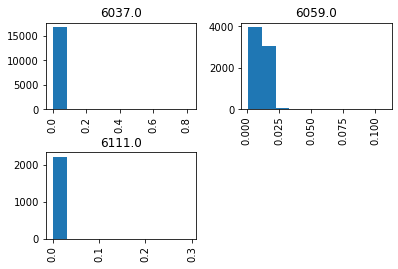

In [89]:
df_taxrate['tax_rate'].hist(by = df['county'])

In [90]:
df.head()

,parcelid,baths,beds,sqrft,county,yearbuilt,taxval,taxamt,propertylandusetypeid
0,11721753,2.0,3.0,1316.0,6037.0,1923.0,205123.0,2627.48,261.0
1,11289917,2.0,3.0,1458.0,6037.0,1970.0,136104.0,2319.90,261.0
2,11705026,1.0,2.0,1421.0,6037.0,1911.0,35606.0,543.69,261.0
3,14269464,3.0,4.0,2541.0,6059.0,2003.0,880456.0,9819.72,261.0
4,11446756,2.0,3.0,1491.0,6037.0,1955.0,107110.0,1399.27,261.0


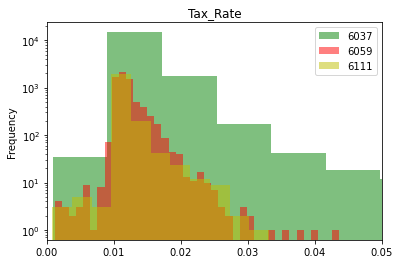

In [91]:
x1 = df_taxrate.loc[df.county==6037, 'tax_rate']
x2 = df_taxrate.loc[df.county==6059, 'tax_rate']
x3 = df_taxrate.loc[df.county==6111, 'tax_rate']

kwargs = dict(alpha=0.5, bins=100)

plt.hist(x1, **kwargs, color='g', label=6037)
plt.hist(x2, **kwargs, color='r', label=6059)
plt.hist(x3, **kwargs, color='y', label=6111)
plt.gca().set(title= 'Tax_Rate', ylabel = "Frequency")
plt.xlim(0,.05)
plt.yscale('log')
plt.legend();